This notebook will guide through spectral clustering.

As an unsupervised ML algorithm, spectral clustering takes in some parameters and derives information from data.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial import distance

In [ ]:
def full_kmeans(data, k):
    km_alg = KMeans(n_clusters=k, init="random", random_state=70, max_iter=200)
    fit = km_alg.fit(data)
    return fit.labels_, fit.cluster_centers_


def make_adj(data):
    distances = distance.cdist(data, data, 'euclidean')
    inds = distances < 1 / 2

    n_rows = distances.shape[0]
    adj_m = np.zeros([n_rows, n_rows])
    adj_m[inds] = 1
    diag = np.diag(np.diag(adj_m))
    adj_m = adj_m - diag
    return adj_m


def my_laplacian(adj_m):
    colsum = np.sum(adj_m, axis=0)
    degree = colsum[:]
    degree_diag = np.diag(degree)
    L = degree_diag - adj_m
    return L


def spect_clustering(L, k):
    eigvals, eigvecs = np.linalg.eig(L)
    inds = np.abs(eigvals).argsort()
    ordered_eigvecs = eigvecs[:, inds]
    firstK = ordered_eigvecs[:, :k]
    labels, centers = full_kmeans(firstK, k)
    return labels, centers


In [9]:
nums = pd.read_csv("hw3data.csv")
nums_np = nums.to_numpy()

In [10]:
labels, centers = full_kmeans(nums_np, 2)

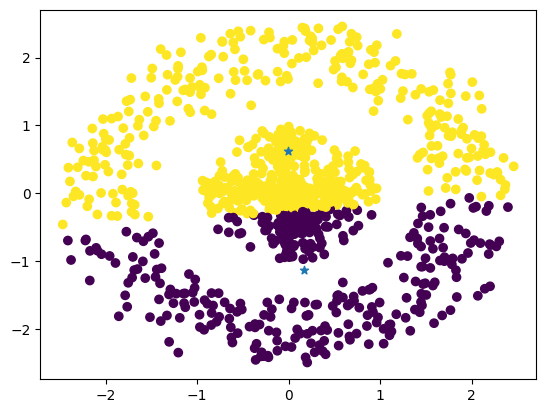

In [11]:
plt.scatter(nums_np[:,0], nums_np[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker="*")

1. Clearly, simple kmeans don't work for the case when the data is clustered in a way that's not divided with straight lines

(999, 2)
float64


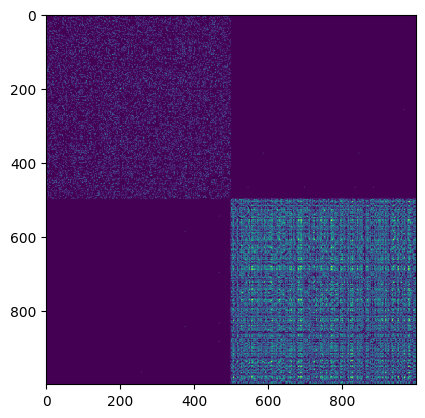

In [12]:
plt.imshow(make_adj(nums_np))

2.A. This adjacency matrix plot shows that some clusters are located very close to the center, and that's the more dense part of the plot.
The less dense part of the plot indicates that the other cluster of data is further from the center.

[[ 35.   0.  -1. ...   0.   0.   0.]
 [  0.  24.   0. ...   0.   0.   0.]
 [ -1.   0.  25. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 142.  -1.   0.]
 [  0.   0.   0. ...  -1. 213.   0.]
 [  0.   0.   0. ...   0.   0.  60.]]


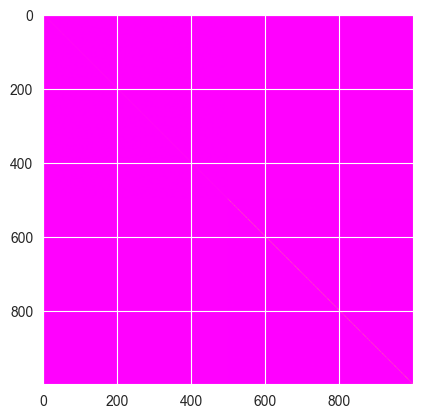

In [12]:
L = my_laplacian(make_adj(nums_np))
plt.imshow(L, cmap="spring")

2.B. It's surprising to notice that this line has a trace on the previous plot if to look close enough. From discussions with fellow classmates I realized that the line represents the space between the two clusters.

[[-3.16385999e-02  3.01389936e-02  5.88754915e-02 ... -2.45824047e-13
  -4.25169313e-13  1.98508782e-13]
 [-3.16385999e-02  3.15621772e-02  4.94994420e-02 ...  2.70089624e-15
   4.97186801e-15 -2.24075778e-15]
 [-3.16385999e-02  3.00274140e-02  5.95700976e-02 ... -1.58674973e-13
  -2.74933088e-13  1.28893685e-13]
 ...
 [-3.16385999e-02 -3.15595923e-02 -1.21946914e-03 ...  1.07186764e-02
   1.51735719e-02 -9.13461875e-03]
 [-3.16385999e-02 -3.15805169e-02 -1.18726572e-03 ... -4.55622259e-04
  -1.04348611e-02  3.73699759e-03]
 [-3.16385999e-02 -3.16080041e-02 -1.16945618e-03 ... -5.20211411e-06
   3.81664569e-04 -3.33444580e-04]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

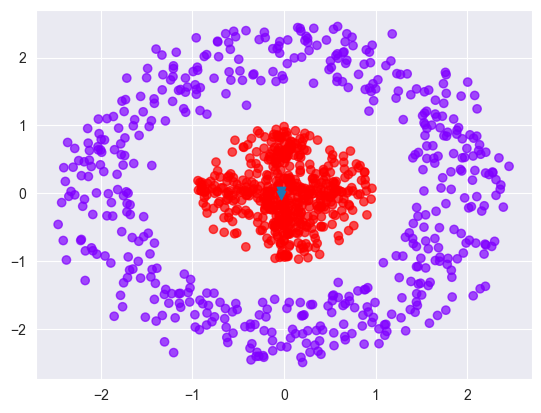

In [5]:
labels, centers = spect_clustering(L, 2)
plt.scatter(nums_np[:,0], nums_np[:,1], c=labels, cmap="rainbow", alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], marker="v")


3. Yaaay it works! In seriousness, looks like the spectral clustering is computed basing on  density of the cluster points and their distance from the point that is closest to most of the points. It was fun and I learned that laplasian only needs one of colsum/rowsum.